In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.tree import *
from sklearn.ensemble import *
from numpy import random
from sklearn.preprocessing import *
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier

In [2]:
df=pd.read_csv("/kaggle/input/weather-prediction/seattle-weather.csv")
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [4]:
df.count()

date             1461
precipitation    1461
temp_max         1461
temp_min         1461
wind             1461
weather          1461
dtype: int64

## Data Preprocessing

In [5]:
print(np.unique(df['weather']))

['drizzle' 'fog' 'rain' 'snow' 'sun']


In [6]:
df['weather']=df['weather'].map({'drizzle':0,'fog':1,'rain':2,'snow':3,'sun':4})

In [7]:
df['year']=pd.DatetimeIndex(df['date']).year
df['month']=pd.DatetimeIndex(df['date']).month
df['day']=pd.DatetimeIndex(df['date']).day

In [8]:
df=df.drop(['date'],axis=1)

In [9]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,0.0,12.8,5.0,4.7,0,2012,1,1
1,10.9,10.6,2.8,4.5,2,2012,1,2
2,0.8,11.7,7.2,2.3,2,2012,1,3
3,20.3,12.2,5.6,4.7,2,2012,1,4
4,1.3,8.9,2.8,6.1,2,2012,1,5


## Exploratory Data Analysis

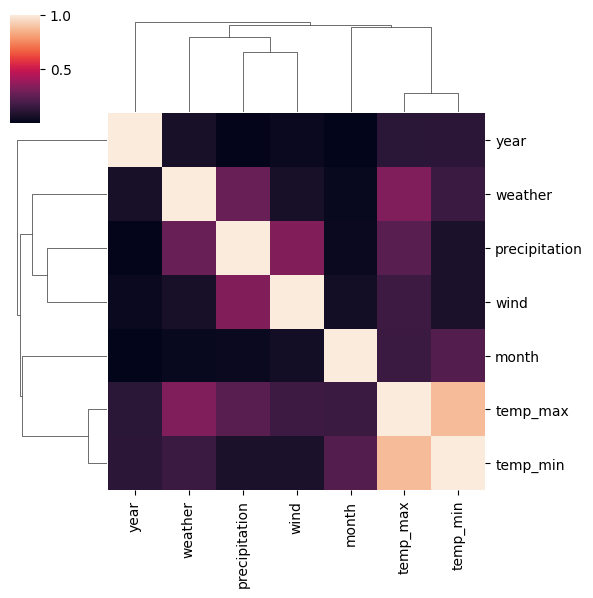

In [10]:
sns.clustermap(abs(df[['precipitation','temp_max','temp_min','wind','weather','year','month']].corr()), figsize=(6, 6))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

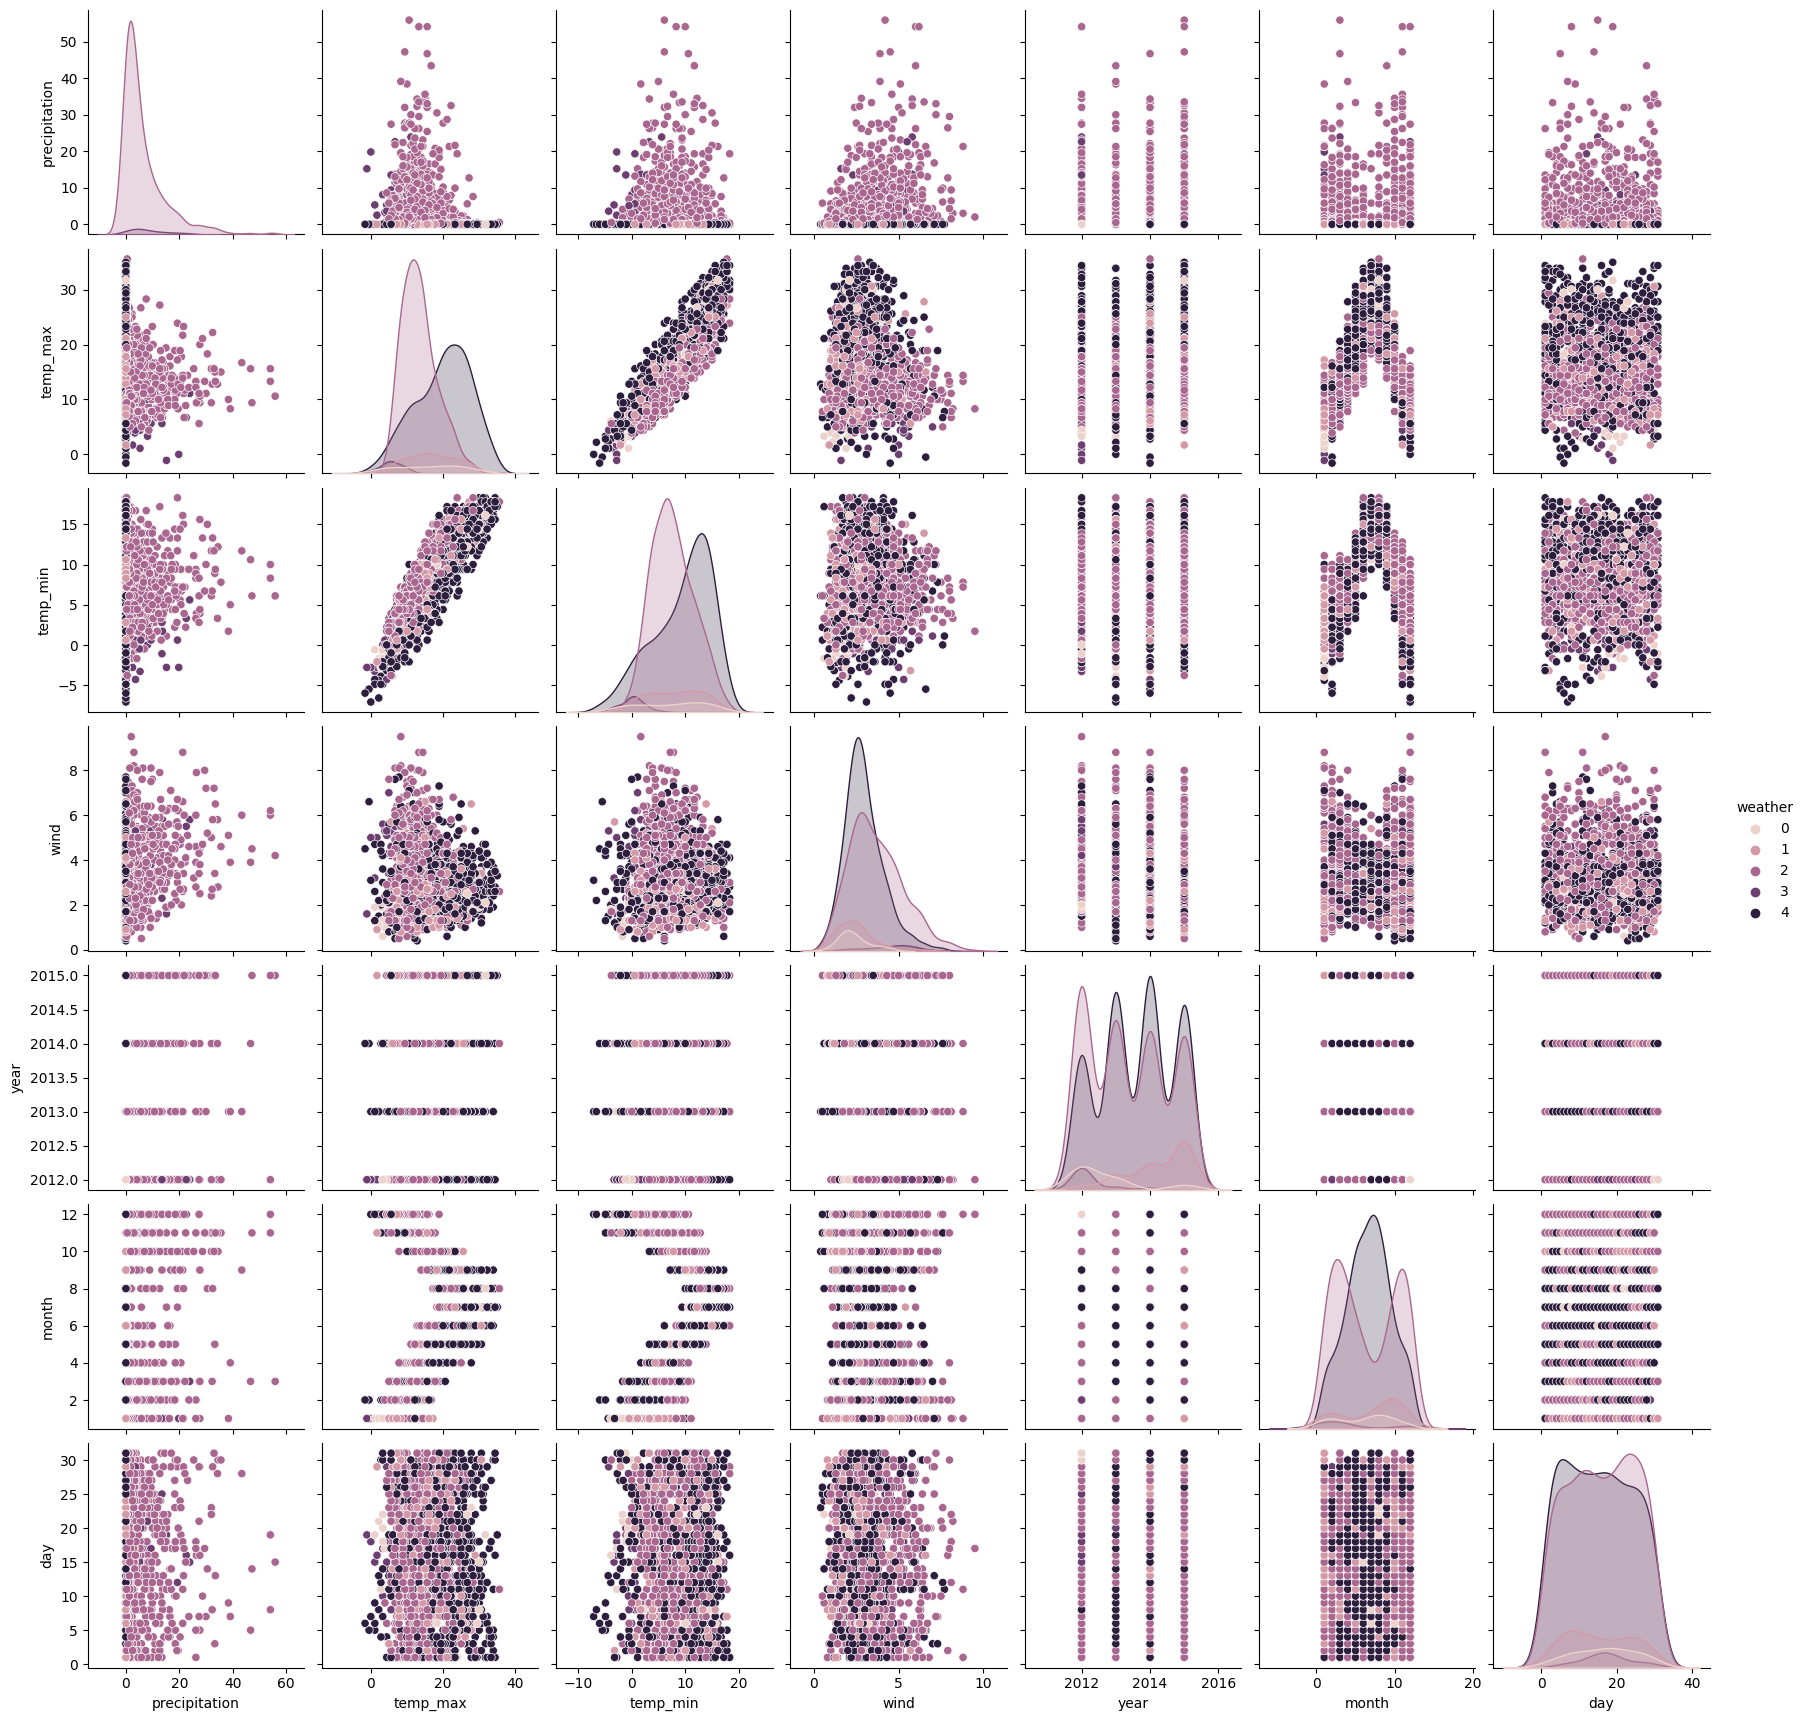

In [11]:
sns.pairplot(data=df,hue='weather')

## Model Selection and Training:


In [12]:
X = df.drop(['weather'], axis=1).values
Y = df[['weather']].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)
Y_hat = model.predict(X_test)

/tmp/ipykernel_18/3441144067.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


## Model Evaluation:

In [14]:
print('accuracy :',accuracy_score(Y_test,Y_hat))

accuracy : 0.8498293515358362


In [15]:
confusion_matrix(Y_test,Y_hat)

array([[  2,   0,   0,   0,   7],
       [  0,   6,   0,   0,  19],
       [  0,   0, 111,   1,   8],
       [  0,   0,   6,   2,   0],
       [  2,   1,   0,   0, 128]])

In [16]:
print(classification_report(Y_test,Y_hat))

              precision    recall  f1-score   support

           0       0.50      0.22      0.31         9
           1       0.86      0.24      0.38        25
           2       0.95      0.93      0.94       120
           3       0.67      0.25      0.36         8
           4       0.79      0.98      0.87       131

    accuracy                           0.85       293
   macro avg       0.75      0.52      0.57       293
weighted avg       0.85      0.85      0.83       293



In [17]:
df.weather.value_counts()

weather
2    641
4    640
1    101
0     53
3     26
Name: count, dtype: int64

# Under sampling

In [18]:
X = df.drop('weather', axis=1)
y = df['weather']
sampler = RandomUnderSampler()
X,y=sampler.fit_resample(X,y)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
print('accuracy :',accuracy_score(y_test,y_hat))

accuracy : 0.5769230769230769


In [20]:
confusion_matrix(Y_test,Y_hat)

array([[  2,   0,   0,   0,   7],
       [  0,   6,   0,   0,  19],
       [  0,   0, 111,   1,   8],
       [  0,   0,   6,   2,   0],
       [  2,   1,   0,   0, 128]])

In [21]:
print(classification_report(Y_test,Y_hat))

              precision    recall  f1-score   support

           0       0.50      0.22      0.31         9
           1       0.86      0.24      0.38        25
           2       0.95      0.93      0.94       120
           3       0.67      0.25      0.36         8
           4       0.79      0.98      0.87       131

    accuracy                           0.85       293
   macro avg       0.75      0.52      0.57       293
weighted avg       0.85      0.85      0.83       293



# Over sampling

In [22]:
X = df.drop('weather', axis=1)
y = df['weather']
sampler = RandomOverSampler()
X,y=sampler.fit_resample(X,y)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
print('accuracy :',accuracy_score(y_test,y_hat))

accuracy : 0.9594383775351014


In [24]:
confusion_matrix(y_test,y_hat)

array([[128,   0,   0,   0,   0],
       [  0, 127,   0,   0,   0],
       [  2,   0, 120,   3,  11],
       [  0,   0,   0, 119,   0],
       [  6,   3,   1,   0, 121]])

In [25]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       128
           1       0.98      1.00      0.99       127
           2       0.99      0.88      0.93       136
           3       0.98      1.00      0.99       119
           4       0.92      0.92      0.92       131

    accuracy                           0.96       641
   macro avg       0.96      0.96      0.96       641
weighted avg       0.96      0.96      0.96       641



# XGboost

In [26]:
X = df.drop('weather', axis=1)
y = df['weather']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBClassifier(scale_pos_weight=28517/548)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
print('accuracy :',accuracy_score(y_test,y_hat))

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [19:18:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


accuracy : 0.8327645051194539


In [27]:
confusion_matrix(y_test,y_hat)

array([[  2,   1,   0,   0,   6],
       [  0,   9,   0,   0,  16],
       [  0,   0, 110,   3,   7],
       [  0,   0,   6,   2,   0],
       [  6,   3,   1,   0, 121]])

In [28]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.25      0.22      0.24         9
           1       0.69      0.36      0.47        25
           2       0.94      0.92      0.93       120
           3       0.40      0.25      0.31         8
           4       0.81      0.92      0.86       131

    accuracy                           0.83       293
   macro avg       0.62      0.53      0.56       293
weighted avg       0.82      0.83      0.82       293

